# Тривиальный подход к решению задачи OneMax с помощью генетического алгоритма и средств фреймворка DEAP

In [1]:
import random
import typing as t

import matplotlib.pyplot as plt
from deap import base
from deap import creator
from deap import tools

%matplotlib inline

Определение констант задачи

In [2]:
# длина подлежащей оптимизации битовой строки
ONE_MAX_LENGTH = 100

# количество индивидуумов в популяции
POPULATION_SIZE = 200
# вероятность скрещивания
P_CROSSOVER = 0.9
# вероятность мутации индивидуума
P_MUTATION = 0.1
# максимальное количество поколений
MAX_GENERATION = 50

Инициализация генератора случайных чисел

In [3]:
RANDOM_SEED = 43
random.seed(RANDOM_SEED)

## Подготовка решения задачи

In [4]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

Определение класса приспособленности отдельного индивидуума

In [5]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

Определение класса индивидуума популяции

In [6]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Инициализация индивидуума

In [7]:
toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    ONE_MAX_LENGTH
)

Инициализация популяции

In [8]:
toolbox.register(
    "populationCreator",
    tools.initRepeat,
    list,
    toolbox.individualCreator
)

Определение функции для вычисления приспособленности

In [9]:
def one_max_fitness(individual: creator.Individual) -> t.Tuple[int]:
    return sum(individual),

In [10]:
toolbox.register("evaluate", one_max_fitness)

Определение генетических операторов

In [11]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / ONE_MAX_LENGTH)

## Эволюция решения

Создание популяции

In [12]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
generation_counter = 0

Определение значения приспособленности для каждого индивидуума

In [13]:
fitness_values = list(map(toolbox.evaluate, population))

Определение значения приспособленности

In [14]:
for individual, fitness_value in zip(population, fitness_values):
    individual.fitness.values = fitness_value

Получение значений приспособленности для статистики

In [15]:
fitness_values = [individual.fitness.values[0] for individual in population]

In [16]:
max_fitness_values = []
mean_fitness_values = []

Запуск эволюционного цикла

In [17]:
while max(fitness_values) < ONE_MAX_LENGTH and generation_counter < MAX_GENERATION:
    generation_counter += 1

    # Применить оператор отбора к популяции
    offspring = toolbox.select(population, len(population))
    # Клонировать выбранные индивидуумы
    offspring = list(map(toolbox.clone, offspring))

    # Применить оператор скрещивания к выбранным индивидуумам
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Применить оператор мутации
    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Определить приспособленность новых особей популяции
    fresh_individuals = [ind for ind in offspring if not ind.fitness.valid]
    fresh_fitness_values = list(map(toolbox.evaluate, fresh_individuals))
    for individual, fitness_value in zip(fresh_individuals, fresh_fitness_values):
        individual.fitness.values = fitness_value

    # Обновить популяцию
    population[:] = offspring

    # Получить значение приспособленности для статистики
    fitness_values = [ind.fitness.values[0] for ind in population]

    # Обновить статистику
    max_fitness = max(fitness_values)
    mean_fitness = sum(fitness_values) / len(fitness_values)

    max_fitness_values.append(max_fitness)
    mean_fitness_values.append(mean_fitness)

    print(
        f"- Поколение {generation_counter}: Макс. приспособ. = {max_fitness}, "
        f"Средняя приспособ. = {mean_fitness}"
    )

    # Определить индекс (первого) лучшего индивидуума
    best_index = fitness_values.index(max_fitness)
    print("  Лучший индивидуум = ", *population[best_index], "\n")

- Поколение 1: Макс. приспособ. = 70.0, Средняя приспособ. = 54.4
  Лучший индивидуум =  1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 

- Поколение 2: Макс. приспособ. = 73.0, Средняя приспособ. = 58.21
  Лучший индивидуум =  1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 

- Поколение 3: Макс. приспособ. = 71.0, Средняя приспособ. = 61.985
  Лучший индивидуум =  1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 

- Поколение 4: Макс. приспособ. = 75.0, Средняя приспособ. = 65.225
  Лучший индивидуум =  0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1

Отображение результатов изменения значений средней и максимальной приспособленности

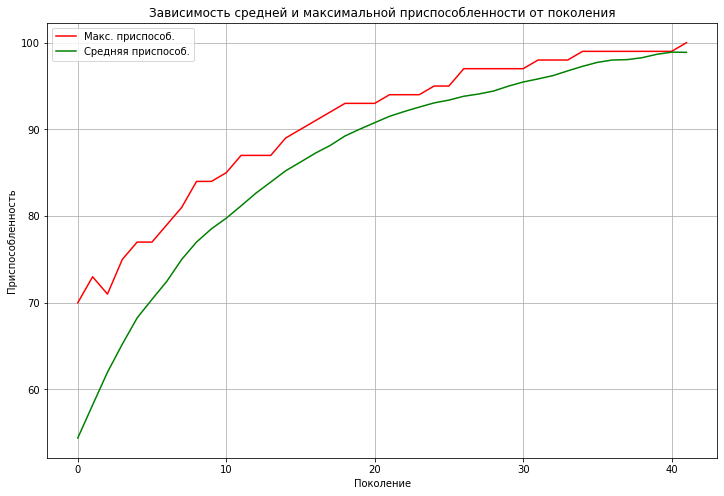

In [18]:
_, ax = plt.subplots(figsize=(12, 8))

ax.plot(max_fitness_values, color="red", label="Макс. приспособ.")
ax.plot(mean_fitness_values, color="green", label="Средняя приспособ.")

ax.set_xlabel("Поколение")
ax.set_ylabel("Приспособленность")
ax.set_title("Зависимость средней и максимальной приспособленности от поколения")

ax.grid(True)
ax.legend()

plt.show();